# Pair Programming Limpieza III - Valores extremos

In [25]:
df = pd.read_csv("datos/bank-additional-full.csv", index_col=0)

In [26]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

pd.options.display.max_columns = None

Hipótesis

- La edad, el trabajo, el estado civil, la educación, la situación de deuda y la forma de contacto pueden influir en la probabilidad de que un cliente acepte la oferta.

- El número de veces que se ha contactado a un cliente en el pasado (campo campaign), el número de días que han pasado desde el último contacto (campo pdays), y el resultado de la campaña anterior (campo poutcome) pueden afectar la respuesta del cliente a una nueva oferta.

- Las variables económicas (tales como el índice de precios al consumidor (cons.price.idx), la tasa de variación del empleo (emp.var.rate), etc.) pueden influir en la probabilidad de que un cliente acepte la oferta.

- Los clientes que ya tienen una hipoteca (housing) o un préstamo (loan) pueden ser menos propensos a aceptar una nueva oferta, ya que podrían estar limitados financieramente.

In [27]:
df.head(3)

,age,job,marital,education,default,housing,loan,contact,duration,campaign,pdays,previous,poutcome,"emp,var,rate","cons,price,idx","cons,conf,idx",euribor3m,"nr,employed",y,month_day_week,month,weekday
0,56,housemaid,married,basic 4y,Si,Si,Si,telephone,261,1,999,0,NONEXISTENT,1.1,93.994,-36.4,4.857,5191.0,no,"['may', 'mon']",'may','mon'
1,57,services,married,high school,NaN,Si,Si,telephone,149,1,999,0,NONEXISTENT,1.1,93.994,-36.4,4.857,5191.0,no,"['may', 'mon']",'may','mon'
2,37,services,married,high school,Si,No,Si,telephone,226,1,999,0,NONEXISTENT,1.1,93.994,-36.4,4.857,5191.0,no,"['may', 'mon']",'may','mon'



Ya hemos limpiado todas las columnas que parecía que no tenían el tipo de dato que queríamos o que tenían demasiada información. Por lo tanto, en este ejercicio tendremos que limpiar los outliers.

- ¿Sobre qué columnas podremos eliminar o reemplazar los outliers?


In [28]:
df_numericas = df.select_dtypes(include=np.number)
df_numericas.head(10)

,age,duration,campaign,pdays,previous,"emp,var,rate","cons,price,idx","cons,conf,idx",euribor3m,"nr,employed"
0,56,261,1,999,0,1.1,93.994,-36.4,4.857,5191.0
1,57,149,1,999,0,1.1,93.994,-36.4,4.857,5191.0
2,37,226,1,999,0,1.1,93.994,-36.4,4.857,5191.0
3,40,151,1,999,0,1.1,93.994,-36.4,4.857,5191.0
4,56,307,1,999,0,1.1,93.994,-36.4,4.857,5191.0
5,45,198,1,999,0,1.1,93.994,-36.4,4.857,5191.0
6,59,139,1,999,0,1.1,93.994,-36.4,4.857,5191.0
7,41,217,1,999,0,1.1,93.994,-36.4,4.857,5191.0
8,24,380,1,999,0,1.1,93.994,-36.4,4.857,5191.0
9,25,50,1,999,0,1.1,93.994,-36.4,4.857,5191.0


In [29]:
# con esto miramos la longitud de las columnas del dataframe con variables numéricas

len(df_numericas.columns)

10

- Identifica visualmente los outliers

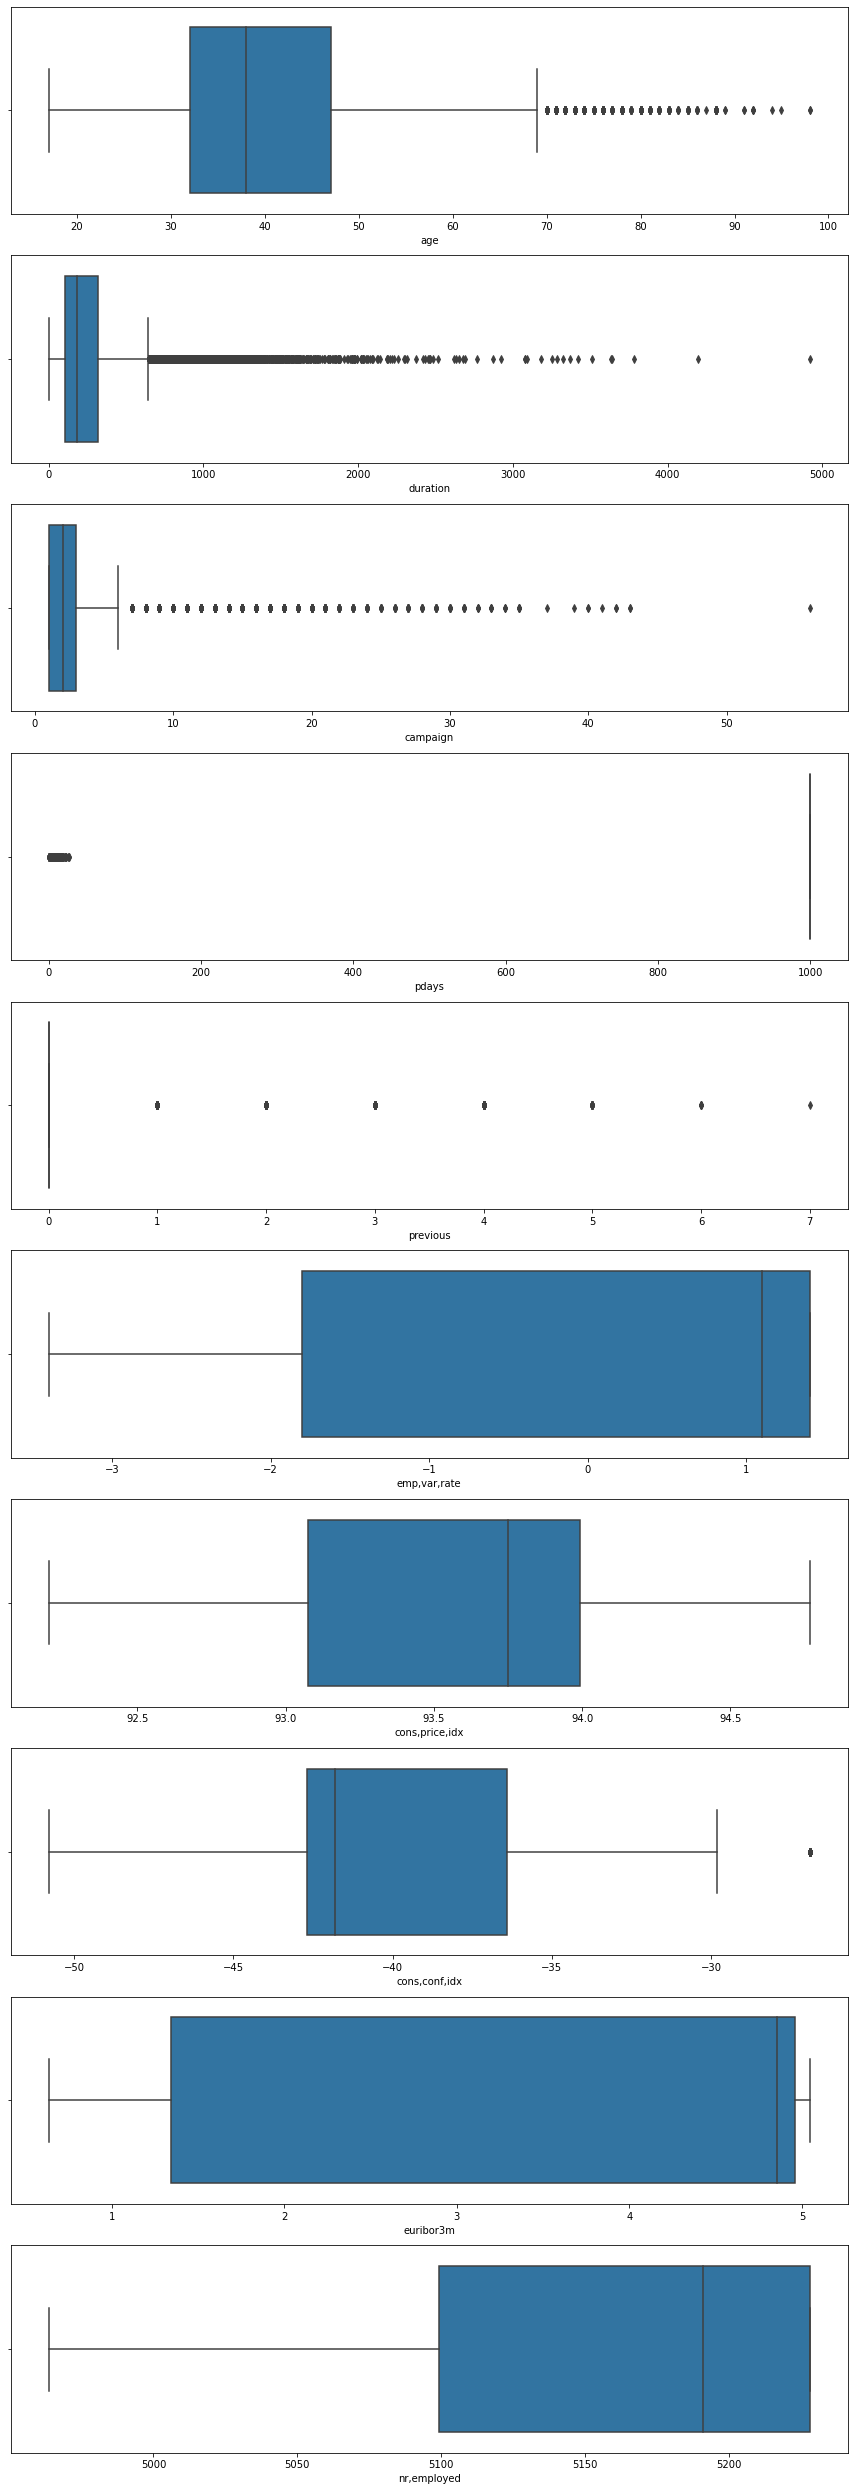

In [30]:
fig, ax = plt.subplots(10, 1, figsize=(15,45))

for i in range(len(df_numericas.columns)):
    sns.boxplot(x=df_numericas.columns[i], data=df_numericas, ax=ax[i])
plt.show()

- Identifica sobre el dataframe las filas que son outliers

In [31]:
def detectar_outliers(lista_columnas, dataframe): 
    
    dicc_indices = {} # creamos un diccionario donde almacenaremos índices de los outliers
    
    # iteramos por la lista de las columnas numéricas de nuestro dataframe
    for col in lista_columnas:
        
        #calculamos los cuartiles Q1 y Q3
        Q1 = np.nanpercentile(df[col], 25)
        Q3 = np.nanpercentile(df[col], 75)
        
        # calculamos el rango intercuartil
        IQR = Q3 - Q1
        
        # calculamos los límites
        outlier_step = 1.5 * IQR
        
        # filtramos nuestro dataframe para indentificar los outliers
        outliers_data = dataframe[(dataframe[col] < Q1 - outlier_step) | (dataframe[col] > Q3 + outlier_step)]
        
        
        if outliers_data.shape[0] > 0: # chequeamos si nuestro dataframe tiene alguna fila. 
        
            dicc_indices[col] = (list(outliers_data.index)) # si tiene fila es que hay outliers y por lo tanto lo añadimos a nuestro diccionario
        

    
    return dicc_indices 

In [32]:
lista_columnas = list(df_numericas.columns)
lista_columnas

['age',
 'duration',
 'campaign',
 'pdays',
 'previous',
 'emp,var,rate',
 'cons,price,idx',
 'cons,conf,idx',
 'euribor3m',
 'nr,employed']

In [33]:
#aplicamos la función y sacamos los índices de los outliers.

ind = detectar_outliers(lista_columnas, df)

print(ind)

{'age': [27713, 27757, 27780, 27800, 27802, 27805, 27808, 27810, 27811, 27812, 27813, 27814, 27815, 27816, 27817, 27818, 27826, 27837, 27838, 27844, 27851, 27875, 27879, 27902, 27930, 27950, 27951, 27963, 28220, 28221, 28312, 28456, 28504, 28530, 28540, 28586, 28619, 28732, 28773, 29225, 29263, 29498, 29625, 29668, 29682, 29973, 29977, 29981, 29987, 29990, 30000, 30004, 30006, 30072, 30078, 30079, 30088, 30103, 30110, 30133, 30171, 30214, 30225, 30227, 30241, 30334, 30335, 30390, 30430, 30460, 30589, 35833, 35848, 35856, 35878, 35973, 36183, 36285, 36311, 36383, 36384, 36816, 36998, 37136, 37137, 37170, 37186, 37190, 37192, 37193, 37195, 37206, 37207, 37213, 37219, 37227, 37235, 37237, 37239, 37257, 37260, 37316, 37341, 37355, 37371, 37403, 37454, 37455, 37472, 37479, 37493, 37505, 37509, 37512, 37525, 37532, 37545, 37568, 37570, 37586, 37597, 37601, 37602, 37604, 37635, 37661, 37675, 37679, 37690, 37692, 37715, 37716, 37735, 37736, 37743, 37756, 37765, 37769, 37775, 37784, 37818, 3781

- Reemplaza los outliers por el estadístico más correcto.

In [34]:
valores = ind.values()

print(valores)

dict_values([[27713, 27757, 27780, 27800, 27802, 27805, 27808, 27810, 27811, 27812, 27813, 27814, 27815, 27816, 27817, 27818, 27826, 27837, 27838, 27844, 27851, 27875, 27879, 27902, 27930, 27950, 27951, 27963, 28220, 28221, 28312, 28456, 28504, 28530, 28540, 28586, 28619, 28732, 28773, 29225, 29263, 29498, 29625, 29668, 29682, 29973, 29977, 29981, 29987, 29990, 30000, 30004, 30006, 30072, 30078, 30079, 30088, 30103, 30110, 30133, 30171, 30214, 30225, 30227, 30241, 30334, 30335, 30390, 30430, 30460, 30589, 35833, 35848, 35856, 35878, 35973, 36183, 36285, 36311, 36383, 36384, 36816, 36998, 37136, 37137, 37170, 37186, 37190, 37192, 37193, 37195, 37206, 37207, 37213, 37219, 37227, 37235, 37237, 37239, 37257, 37260, 37316, 37341, 37355, 37371, 37403, 37454, 37455, 37472, 37479, 37493, 37505, 37509, 37512, 37525, 37532, 37545, 37568, 37570, 37586, 37597, 37601, 37602, 37604, 37635, 37661, 37675, 37679, 37690, 37692, 37715, 37716, 37735, 37736, 37743, 37756, 37765, 37769, 37775, 37784, 37818,

In [35]:
valores = {indice for sublista in valores for indice in sublista}

print(valores)

{32768, 32771, 32777, 32782, 32784, 32785, 32789, 32790, 32792, 32797, 32798, 32801, 32804, 37, 32807, 32809, 32811, 32815, 32817, 32820, 32824, 57, 32825, 32827, 61, 32830, 32829, 32831, 32832, 32836, 32837, 32839, 32841, 75, 32843, 32845, 32846, 32847, 32848, 83, 32852, 88, 32861, 32864, 32865, 32866, 32868, 32872, 32874, 32875, 32878, 111, 32881, 32882, 32884, 32889, 32891, 32893, 32895, 131, 32899, 32900, 32904, 32907, 32913, 32914, 32915, 32919, 32925, 32928, 32929, 32930, 32931, 164, 32932, 169, 32937, 32939, 32949, 182, 32951, 32952, 32954, 32956, 32960, 195, 32965, 198, 199, 32968, 32975, 32982, 32983, 32985, 32987, 32988, 32989, 32992, 32994, 32996, 33000, 33001, 33003, 33006, 33009, 243, 33016, 249, 33019, 33020, 33022, 33026, 33028, 33029, 33030, 33031, 33032, 33035, 33037, 33038, 33042, 276, 33046, 33047, 33049, 33050, 33051, 286, 33056, 33059, 33060, 296, 33071, 33072, 33081, 33082, 33083, 33086, 33089, 33090, 33091, 33092, 33093, 33094, 329, 33098, 33099, 33101, 33103, 33

In [36]:
#df_sin_outliers = df.copy()

In [37]:
# for k, v in ind.items():
#     media = df[k].mean() # calculamos la media para cada una de las columnas que tenemos en nuestro diccionario
#     for i in v: # iteremos por la lista de valores para cada columna
#         df.loc[i,k] = media # usando el loc, reemmplazamos los valores de los outliers por la media que hemos calculado al inicio

In [38]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,41176.0,40.023800,10.420680,17.000,32.000,38.000,47.000,98.000
duration,41176.0,258.315815,259.305321,0.000,102.000,180.000,319.000,4918.000
campaign,41176.0,2.567879,2.770318,1.000,1.000,2.000,3.000,56.000
pdays,41176.0,962.464810,186.937102,0.000,999.000,999.000,999.000,999.000
previous,41176.0,0.173013,0.494964,0.000,0.000,0.000,0.000,7.000
"emp,var,rate",41176.0,0.081922,1.570883,-3.400,-1.800,1.100,1.400,1.400
"cons,price,idx",41176.0,93.575720,0.578839,92.201,93.075,93.749,93.994,94.767
"cons,conf,idx",41176.0,-40.502863,4.627860,-50.800,-42.700,-41.800,-36.400,-26.900
euribor3m,41176.0,3.621293,1.734437,0.634,1.344,4.857,4.961,5.045
"nr,employed",41176.0,5167.034870,72.251364,4963.600,5099.100,5191.000,5228.100,5228.100


In [39]:
# vamos a reemplazar por la mediana porque es una medida menos sensible a valores atipicos

for k, v in ind.items():
    mediana = df[k].median() # calculamos la mediana para cada una de las columnas que tenemos en nuestro diccionario
    for i in v: # iteremos por la lista de valores para cada columna
        df.loc[i,k] = mediana # usando el loc, reemmplazamos los valores de los outliers por la media que hemos calculado al inicio

<AxesSubplot:xlabel='duration'>

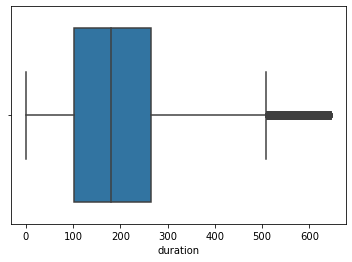

In [40]:
sns.boxplot(x='duration', data=df)

In [41]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,41176.0,39.581212,9.621591,17.000,32.000,38.000,47.000,69.000
duration,41176.0,201.596197,135.989810,0.000,102.000,180.000,265.000,644.000
campaign,41176.0,2.041748,1.242412,1.000,1.000,2.000,3.000,6.000
pdays,41176.0,999.000000,0.000000,999.000,999.000,999.000,999.000,999.000
previous,41176.0,0.000000,0.000000,0.000,0.000,0.000,0.000,0.000
"emp,var,rate",41176.0,0.081922,1.570883,-3.400,-1.800,1.100,1.400,1.400
"cons,price,idx",41176.0,93.575720,0.578839,92.201,93.075,93.749,93.994,94.767
"cons,conf,idx",41176.0,-40.664253,4.405107,-50.800,-42.700,-41.800,-36.400,-29.800
euribor3m,41176.0,3.621293,1.734437,0.634,1.344,4.857,4.961,5.045
"nr,employed",41176.0,5167.034870,72.251364,4963.600,5099.100,5191.000,5228.100,5228.100



Guarda el csv con las columnas limpias para seguir trabajando con este dataframe limpio en el siguiente pair programming de limpieza.

In [42]:
df.to_csv("datos/bank-additional-full.csv")